In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/auto-insurance-data/train(1).csv


Importing the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score,mean_squared_error
from sklearn.utils import resample
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Load the Data

In [3]:
auto = pd.read_csv('/kaggle/input/auto-insurance-data/train(1).csv')
df1= auto.copy()
auto.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [4]:
auto.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
auto.shape

(595212, 59)

### Exploratory Data Analysis

3 Important Inferences:

Inferences 1: This is high dimensional data with 59 columns. Most of the features are uncorrelated.

In [6]:
percentage = (auto['target'].value_counts()/(auto.shape[0]))*100
print('% of claims rejected' ,round(percentage[0],2))
print('% of claims accepted' ,round(percentage[1],2))

% of claims rejected 96.36
% of claims accepted 3.64


Inferences 2: The target of prediction of data is highly skewed towards claims rejected (approx 96%) and 4% data are accepted.

In [7]:
auto2 = auto.replace(-1,np.nan) # null values are representing with -1 in this dataset
pd.options.display.float_format = "{:,.5f}".format
auto2.isnull().sum()*100 / auto2.shape[0]

id                0.00000
target            0.00000
ps_ind_01         0.00000
ps_ind_02_cat     0.03629
ps_ind_03         0.00000
ps_ind_04_cat     0.01394
ps_ind_05_cat     0.97595
ps_ind_06_bin     0.00000
ps_ind_07_bin     0.00000
ps_ind_08_bin     0.00000
ps_ind_09_bin     0.00000
ps_ind_10_bin     0.00000
ps_ind_11_bin     0.00000
ps_ind_12_bin     0.00000
ps_ind_13_bin     0.00000
ps_ind_14         0.00000
ps_ind_15         0.00000
ps_ind_16_bin     0.00000
ps_ind_17_bin     0.00000
ps_ind_18_bin     0.00000
ps_reg_01         0.00000
ps_reg_02         0.00000
ps_reg_03        18.10649
ps_car_01_cat     0.01798
ps_car_02_cat     0.00000
ps_car_03_cat    69.08984
ps_car_04_cat     0.00000
ps_car_05_cat    44.78253
ps_car_06_cat     0.00000
ps_car_07_cat     1.93024
ps_car_08_cat     0.00000
ps_car_09_cat     0.09560
ps_car_10_cat     0.00000
ps_car_11_cat     0.00000
ps_car_11         0.00084
ps_car_12         0.00017
ps_car_13         0.00000
ps_car_14         7.16047
ps_car_15   

Inferences 3: Only 12 attributes out of 59 attributes have missing values, out of which "ps_car_03_cat" has more than 50% of data missing while rest are less than 50% missing data, which can be useful for furhter analysis.

<Axes: >

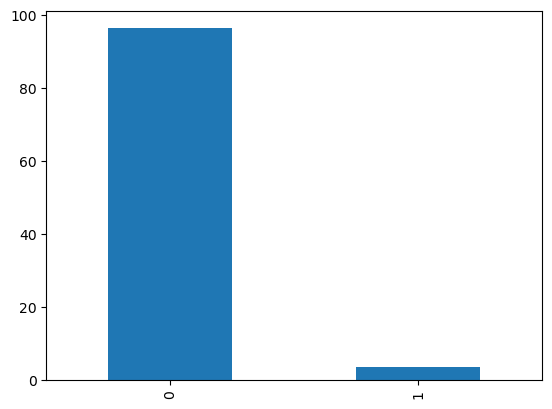

In [8]:
percentage.plot.bar()

Data not balanced. Target 0 and 1 is not in the right proportion.

In [9]:
col_list=list(auto.columns)
var_count_dict=dict.fromkeys(['binary_var_count','categorical_var_count','continuous/ordinal_var_count'],0)
continuous_ordinal_var = []
binary_var = []
categorical_var = []
for i in list(auto.columns):
    if i.endswith("bin")  or i=='target':
        var_count_dict['binary_var_count']+=1
        binary_var.append(i)
    elif i.endswith("cat"):
        var_count_dict['categorical_var_count']+=1
        categorical_var.append(i)
    else:
        var_count_dict['continuous/ordinal_var_count']+=1
        continuous_ordinal_var.append(i)
print(var_count_dict)

{'binary_var_count': 18, 'categorical_var_count': 14, 'continuous/ordinal_var_count': 27}


From above we can observe that there are 18 binary features, 14 categorical features and 27 continuous/ordinal features.

#### Inferences from data on interval, binary and ordinal variables.

In [10]:
interval_var = []
ordinal_var = []
for i in continuous_ordinal_var:
    if auto[i].dtype=='float':
        interval_var.append(i)
    else:
        if i!='id':
            ordinal_var.append(i)

In [11]:
print("Ordinal variables: ",ordinal_var)
print("\n")
print('Interval variables: ',interval_var)
print("\n")
print("Binary variables: ",binary_var)

Ordinal variables:  ['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_car_11', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14']


Interval variables:  ['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03']


Binary variables:  ['target', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']


In [12]:
auto[ordinal_var].head()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
0,2,5,0,11,2,3,1,10,1,10,1,5,9,1,5,8
1,1,7,0,3,3,2,1,9,5,8,1,7,3,1,1,9
2,5,9,0,12,1,2,2,9,1,8,2,7,4,2,7,7
3,0,2,0,8,1,2,4,7,1,8,4,2,2,2,4,9
4,0,0,0,9,3,2,2,6,3,10,2,12,3,1,1,3


In [13]:
auto[interval_var].head()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
0,0.70000,0.20000,0.71807,0.40000,0.88368,0.37081,3.60555,0.60000,0.50000,0.20000
1,0.80000,0.40000,0.76608,0.31623,0.61882,0.38872,2.44949,0.30000,0.10000,0.30000
2,0.00000,0.00000,-1.00000,0.31623,0.64159,0.34728,3.31662,0.50000,0.70000,0.10000
3,0.90000,0.20000,0.58095,0.37417,0.54295,0.29496,2.00000,0.60000,0.90000,0.10000
4,0.70000,0.60000,0.84076,0.31607,0.56583,0.36510,2.00000,0.40000,0.60000,0.00000


In [14]:
auto[binary_var].head()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1
1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0
2,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0
3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0


- Ordinal variables here are sort of one-hot encoded fetures here, which is integral in nature ranging from 0 to some integer "n".
- Interval variables appear to be of type float.
- Binary variables are the ones that only take (0 or 1) values.

In [15]:
"""plt.figure(figsize=(15,15))
for i in enumerate(interval_var):
    plt.subplot(5,2,i[0]+1)
    sns.distplot(auto[i[1]])
    plt.tight_layout()"""

'plt.figure(figsize=(15,15))\nfor i in enumerate(interval_var):\n    plt.subplot(5,2,i[0]+1)\n    sns.distplot(auto[i[1]])\n    plt.tight_layout()'

In [16]:
"""plt.figure(figsize=(15,15))
for i in enumerate(interval_var):
    plt.subplot(5,2,i[0]+1)
    sns.boxplot(x=auto[i[1]])
    plt.tight_layout()"""

'plt.figure(figsize=(15,15))\nfor i in enumerate(interval_var):\n    plt.subplot(5,2,i[0]+1)\n    sns.boxplot(x=auto[i[1]])\n    plt.tight_layout()'

In [17]:
"""plt.figure(figsize=(15,15))
for i in enumerate(ordinal_var):
    plt.subplot(4,4,i[0]+1)
    sns.distplot(auto[i[1]])
    plt.tight_layout()"""

'plt.figure(figsize=(15,15))\nfor i in enumerate(ordinal_var):\n    plt.subplot(4,4,i[0]+1)\n    sns.distplot(auto[i[1]])\n    plt.tight_layout()'

In [18]:
"""plt.figure(figsize=(15,15))
for i in enumerate(ordinal_var):
    plt.subplot(4,4,i[0]+1)
    sns.boxplot(x=auto[i[1]])
    plt.tight_layout()"""

'plt.figure(figsize=(15,15))\nfor i in enumerate(ordinal_var):\n    plt.subplot(4,4,i[0]+1)\n    sns.boxplot(x=auto[i[1]])\n    plt.tight_layout()'

In [19]:
"""plt.figure(figsize=(15,15))
for i in enumerate(binary_var):
    plt.subplot(6,3,i[0]+1)
    sns.distplot(auto[i[1]])
    plt.tight_layout()"""

'plt.figure(figsize=(15,15))\nfor i in enumerate(binary_var):\n    plt.subplot(6,3,i[0]+1)\n    sns.distplot(auto[i[1]])\n    plt.tight_layout()'

In [20]:
"""plt.figure(figsize=(15,15))
for i in enumerate(binary_var):
    plt.subplot(6,3,i[0]+1)
    sns.boxplot(x=auto[i[1]])
    plt.tight_layout()"""

'plt.figure(figsize=(15,15))\nfor i in enumerate(binary_var):\n    plt.subplot(6,3,i[0]+1)\n    sns.boxplot(x=auto[i[1]])\n    plt.tight_layout()'

- In interval variables, ps_reg_02, ps_reg_03, ps_car_12, ps_car_13, ps_car_14 and ps_car_15 have outliers present in them, while remaining are outlier-free. Also these are the variables that have skewed frequency distribution curve due to the presence of outliers.
- In ordinal variables, except 4 variables like ps_ind_01, ps_ind_03, ps_ind_15 and ps_calc_05 all the remaining ordinal variable have atleast one outliers. Hence, we can observe slight skewness in them from the frequency distributin curve.
- In binary variables, since we only have 2 values(0 and 1) outlier analysis doesn't needed.

As the data is highly imbalanced, we will use SMOTES to balance the data. SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

#### No of features having missing values

In [21]:
missing_count = 0
for i in list(auto.columns):
    if len(auto[auto[i]==-1])>0:
        missing_count+=1  
print("No. of features having missing values:",missing_count)

No. of features having missing values: 12


We will fill the missing values with the median value of the respective non-null features because as we saw earlier, many features have outliers, so filling with mean value is sub-optimal.

In [22]:
# here null values are represent as -1
missing_null = []
for i in list(auto.columns):
    if len(auto[auto[i]==-1])>0:
        missing_null.append(i)
print(missing_null)

['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_03_cat', 'ps_car_05_cat', 'ps_car_07_cat', 'ps_car_09_cat', 'ps_car_11', 'ps_car_12', 'ps_car_14']


In [23]:
vars_with_missing = []

for i in auto.columns:
    missings = auto[auto[i] == -1][i].count()
    if missings > 0:
        vars_with_missing.append(i)
        missings_perc = missings/auto.shape[0]
        
        print('Variable {} has {} records ({:.2%}) with missing values'.format(i, missings, missings_perc))
        
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

Variable ps_ind_02_cat has 216 records (0.04%) with missing values
Variable ps_ind_04_cat has 83 records (0.01%) with missing values
Variable ps_ind_05_cat has 5809 records (0.98%) with missing values
Variable ps_reg_03 has 107772 records (18.11%) with missing values
Variable ps_car_01_cat has 107 records (0.02%) with missing values
Variable ps_car_03_cat has 411231 records (69.09%) with missing values
Variable ps_car_05_cat has 266551 records (44.78%) with missing values
Variable ps_car_07_cat has 11489 records (1.93%) with missing values
Variable ps_car_09_cat has 569 records (0.10%) with missing values
Variable ps_car_11 has 5 records (0.00%) with missing values
Variable ps_car_12 has 1 records (0.00%) with missing values
Variable ps_car_14 has 42620 records (7.16%) with missing values
In total, there are 12 variables with missing values


#### Checking level of correlation among interval variables 

In [24]:
auto[interval_var]

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
0,0.70000,0.20000,0.71807,0.40000,0.88368,0.37081,3.60555,0.60000,0.50000,0.20000
1,0.80000,0.40000,0.76608,0.31623,0.61882,0.38872,2.44949,0.30000,0.10000,0.30000
2,0.00000,0.00000,-1.00000,0.31623,0.64159,0.34728,3.31662,0.50000,0.70000,0.10000
3,0.90000,0.20000,0.58095,0.37417,0.54295,0.29496,2.00000,0.60000,0.90000,0.10000
4,0.70000,0.60000,0.84076,0.31607,0.56583,0.36510,2.00000,0.40000,0.60000,0.00000
...,...,...,...,...,...,...,...,...,...,...
595207,0.50000,0.30000,0.69282,0.37417,0.68463,0.38549,2.64575,0.40000,0.50000,0.30000
595208,0.90000,0.70000,1.38203,0.38730,0.97214,-1.00000,3.60555,0.20000,0.20000,0.00000
595209,0.90000,0.20000,0.65907,0.39749,0.59637,0.39875,1.73205,0.40000,0.00000,0.30000
595210,0.90000,0.40000,0.69821,0.37417,0.76443,0.38497,3.16228,0.00000,0.70000,0.00000


In [25]:
auto[interval_var].corr()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
ps_reg_01,1.00000,0.47103,0.63703,0.01880,0.02710,0.01270,0.00276,-0.00089,0.00219,-0.00154
ps_reg_02,0.47103,1.00000,0.51646,0.17142,0.19432,0.00415,0.05451,0.00135,-0.00077,0.00002
ps_reg_03,0.63703,0.51646,1.00000,0.08258,0.09942,0.00627,0.02293,-0.00148,0.00215,-0.00040
ps_car_12,0.01880,0.17142,0.08258,1.00000,0.67172,0.01240,0.04988,-0.00070,-0.00043,0.00017
ps_car_13,0.02710,0.19432,0.09942,0.67172,1.00000,-0.03731,0.52952,0.00016,0.00004,-0.00020
ps_car_14,0.01270,0.00415,0.00627,0.01240,-0.03731,1.00000,-0.03306,-0.00119,0.00122,0.00043
ps_car_15,0.00276,0.05451,0.02293,0.04988,0.52952,-0.03306,1.00000,0.00034,-0.00025,-0.00104
ps_calc_01,-0.00089,0.00135,-0.00148,-0.00070,0.00016,-0.00119,0.00034,1.00000,-0.00242,0.00053
ps_calc_02,0.00219,-0.00077,0.00215,-0.00043,0.00004,0.00122,-0.00025,-0.00242,1.00000,0.00295
ps_calc_03,-0.00154,0.00002,-0.00040,0.00017,-0.00020,0.00043,-0.00104,0.00053,0.00295,1.00000


<Axes: >

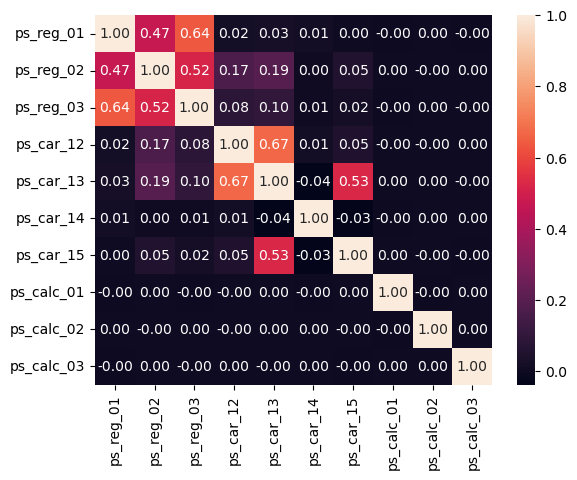

In [26]:
sns.heatmap(auto[interval_var].corr(),annot=True,fmt='.2f')

- ps_car_13, ps_car_12 and ps_reg_02 are the top 3 features that exhibit strong correlation with the target variable.
- In terms of correlation amongst interval variables (ps_reg_02, ps_reg_03) exhibit highest correlation, (ps_car_12, ps_car_13,ps_car_14,ps_car_15) and (ps_reg_01, ps_reg_02) exihibit medium level correlation

#### Checking level of correlation among ordinal variables

In [27]:
auto[ordinal_var].corr()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
ps_ind_01,1.00000,0.22341,-0.02497,0.12214,0.00825,-0.00094,-0.00117,0.00015,-0.00066,0.00299,-0.00009,-0.00134,-0.00126,0.00152,0.00020,-0.00089
ps_ind_03,0.22341,1.00000,0.00199,0.17045,-0.05936,0.00070,-0.00124,0.00236,0.00153,0.00127,-0.00154,0.00023,-0.00272,-0.00235,0.00013,0.00020
ps_ind_14,-0.02497,0.00199,1.00000,-0.12155,0.00442,-0.00110,0.00021,-0.00024,0.00102,0.00408,-0.00144,0.00198,-0.00024,0.00028,0.00031,-0.00039
ps_ind_15,0.12214,0.17045,-0.12155,1.00000,0.02300,0.00158,0.00087,0.00003,0.00172,-0.00131,-0.00098,-0.00128,-0.00195,-0.00126,-0.00092,0.00135
ps_car_11,0.00825,-0.05936,0.00442,0.02300,1.00000,0.00022,0.00246,-0.00025,-0.00033,-0.00246,-0.00051,-0.00057,-0.00121,-0.00118,0.00113,0.00094
ps_calc_04,-0.00094,0.00070,-0.00110,0.00158,0.00022,1.00000,0.00063,-0.00185,0.00145,-0.00185,-0.00004,0.00000,0.00024,0.00098,-0.00021,0.00118
ps_calc_05,-0.00117,-0.00124,0.00021,0.00087,0.00246,0.00063,1.00000,-0.00139,-0.00221,-0.00179,0.00115,-0.00024,0.00039,-0.00021,0.00027,-0.00097
ps_calc_06,0.00015,0.00236,-0.00024,0.00003,-0.00025,-0.00185,-0.00139,1.00000,-0.00008,-0.00060,0.00171,-0.00153,-0.00057,0.00061,0.00097,-0.00087
ps_calc_07,-0.00066,0.00153,0.00102,0.00172,-0.00033,0.00145,-0.00221,-0.00008,1.00000,-0.00208,0.00076,-0.00053,-0.00011,-0.00039,-0.00060,0.00191
ps_calc_08,0.00299,0.00127,0.00408,-0.00131,-0.00246,-0.00185,-0.00179,-0.00060,-0.00208,1.00000,0.00001,-0.00267,0.00202,0.00011,-0.00030,-0.00017


<Axes: >

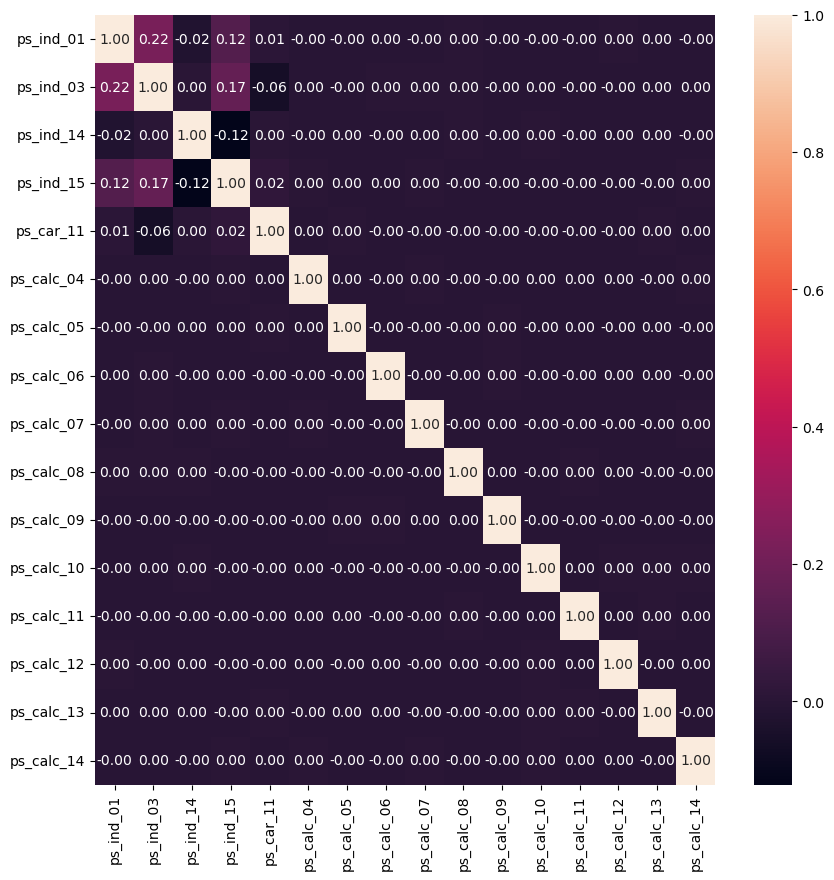

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(auto[ordinal_var].corr(),annot=True,fmt='.2f')

ordinal features in general are exhibiting wery weak correlation among themselves.

In [29]:
# Dropping the variables with too many missing values
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
auto.drop(vars_to_drop, inplace=True, axis=1)
#We will fill the missing values with the median value of the respective non-null features because as we saw earlier, many features have outliers, so filling with mean value is sub-optimal.
for i in list(auto.columns):
    if len(auto[auto[i]==-1])>0:
        auto[i].replace(-1,auto[i].median(),inplace=True)

#### Implementing Hot Enoding for categorical features

In [30]:
categorical_var = [i for i in categorical_var if i not in ['ps_car_05_cat','ps_car_03_cat']]
categorical_var

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_04_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat']

In [31]:
auto3 =pd.get_dummies(data=auto,columns=categorical_var,drop_first=True)
auto3.head()

,id,target,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,...,ps_car_11_cat_95,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104
0,7,0,2,5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,1,7,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13,0,5,9,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16,0,0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,17,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Target=1 shape: (21694, 204) 3.64 % 
Target=0 shape: (573518, 204) 96.36 %

 # This Data shows that it's imbalanced


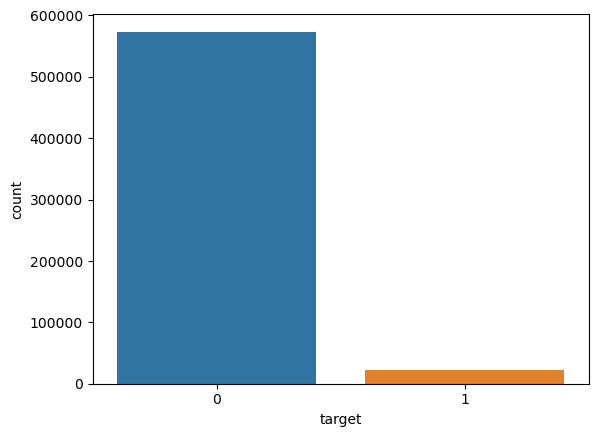

In [32]:
Per1= np.round((auto3[auto3['target']==1].shape[0]*100)/ auto3.shape[0],2)
Per0= np.round((auto3[auto3['target']==0].shape[0]*100)/ auto3.shape[0],2)

print('Target=1 shape:',auto3[auto3['target']==1].shape, Per1,'%','\nTarget=0 shape:',auto3[auto3['target']==0].shape,Per0,'%')
print("\n # This Data shows that it's imbalanced")
sns.countplot(x= auto3['target'])
plt.show()

In [33]:
# using resampling technique, splittinf data into classes
auto_mino= auto3[auto3['target']==1]
auto_majo= auto3[auto3['target']==0]
auto_mino_upsampled = resample(auto_mino,replace=True,n_samples=int(len(auto_majo)*0.12), random_state = 42)

print("Size of data, after achieving a balance of 12%: ", auto_mino_upsampled.shape[0] + auto_majo.shape[0])

Size of data, after achieving a balance of 12%:  642340


#### Applying Resampling to make balance data-set

Class compostion after resampling:
0    573518
1    573518
Name: target, dtype: int64


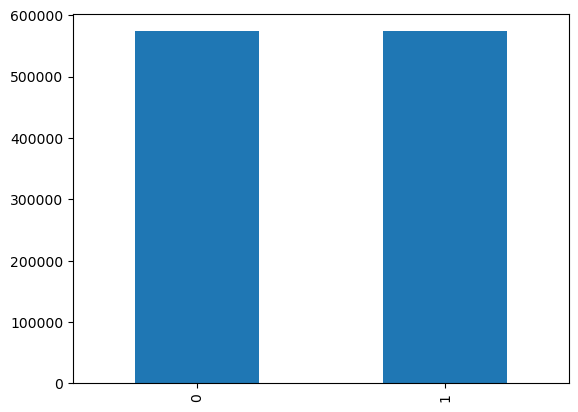

In [34]:
auto_mino_upsampled = resample(auto_mino,replace=True,n_samples=len(auto_majo), random_state = 42)
auto1 = pd.concat([auto_majo,auto_mino_upsampled])
print("Class compostion after resampling:")
print(auto1['target'].value_counts())
auto1['target'].value_counts().plot.bar();

Now here we have both class with equall count

## Summarizing the learning of ED:

We observe the following points about the data:

- The target data is heavily imbalanced, i.e. claims are more likely rejected than accepted.
- The features are mainly of three types: ordinal, interval and categorical. We observed strong correlation in interval variables and weak correlation in ordinal variables.
- We identified that nominal features, in this case ordinal features are suitable for Standard Scaling.
- Also identified features are having outliers present and observed positive and negative skewness through frequency distribution plot.

#### Spliting data in feature & target

In [35]:
x= auto1.drop(['target','id'], axis=1)
y= auto1['target']

#### Spliting data in train test

using 70 percentage for training and 30 percentage for testing

In [36]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test = tts(x, y, test_size = 0.3,random_state = 1)

#### Feature Scaling

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Dimensionality Reduction using PCA

In [38]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

### Logistic Regression

In [39]:
def accuracy_result(y_test, y_pred_test):
    from sklearn import metrics
    from sklearn.metrics import confusion_matrix, classification_report
    confusion_matrix=metrics.confusion_matrix(y_test, y_pred_test)
    # USE THE IMPORTED CONFUSION MATRIX
    print('\n CONFUSION MATRIX:\n ', confusion_matrix,'\n')
    TP = confusion_matrix[1, 1]
    TN = confusion_matrix[0, 0]
    FP = confusion_matrix[0, 1]
    FN = confusion_matrix[1, 0]
    false_positive_rate = round(FP / float(TN + FP),3)
    print('FPR: ', false_positive_rate)
    print('TPR/ RECALL/ SENSTIVITY: ', round(metrics.recall_score(y_test, y_pred_test), 3))
    print('PRECISION:' ,round(metrics.precision_score(y_test, y_pred_test), 3))
    specificity = round(TN / (TN + FP),3)
    print('SPECIFICITY: ',specificity)
    print('ACCURACY: ', np.round(metrics.accuracy_score(y_test, y_pred_test),3))
    print('ROC AUC: ', np.round(roc_auc_score(y_test, y_pred_test),3))
    print('F1 score: ', np.round(f1_score(y_test, y_pred_test),3))
    print('\n CLASSIFICATION REPORT: \n',classification_report(y_test,y_pred_test))
    return 

In [40]:
## 1. Fitting a Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_pca, y_train)

## 2. Predicting on Train and test data

y_pred_train = log_reg.predict(X_train_pca)
y_pred_logreg2 = log_reg.predict(X_test_pca)

## 3. Using function for evaluating the model output

accuracy_result(y_test, y_pred_logreg2)


 CONFUSION MATRIX:
  [[111166  61127]
 [ 90541  81277]] 

FPR:  0.355
TPR/ RECALL/ SENSTIVITY:  0.473
PRECISION: 0.571
SPECIFICITY:  0.645
ACCURACY:  0.559
ROC AUC:  0.559
F1 score:  0.517

 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.55      0.65      0.59    172293
           1       0.57      0.47      0.52    171818

    accuracy                           0.56    344111
   macro avg       0.56      0.56      0.56    344111
weighted avg       0.56      0.56      0.56    344111



### Support Vector Classifier

In [41]:
x_tr=X_train_pca[:10000,:]
y_tr=y_train[:10000]

## 1. svm Classifier with linear kernel

#Create a svm Classifier
clf = svm.SVC(kernel='linear')
# FIT SVC ON TRAINING DATA
clf.fit(x_tr, y_tr)

## 2. Predicting on Train and test data

# y_pred_train = clf.predict(X_train)
y_pred_svc = clf.predict(X_test_pca)

#  model output
accuracy_result(y_test, y_pred_svc)


 CONFUSION MATRIX:
  [[125942  46351]
 [106698  65120]] 

FPR:  0.269
TPR/ RECALL/ SENSTIVITY:  0.379
PRECISION: 0.584
SPECIFICITY:  0.731
ACCURACY:  0.555
ROC AUC:  0.555
F1 score:  0.46

 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.54      0.73      0.62    172293
           1       0.58      0.38      0.46    171818

    accuracy                           0.56    344111
   macro avg       0.56      0.55      0.54    344111
weighted avg       0.56      0.56      0.54    344111



- Not any Significance Improvement for model LinearSVC play with parameters – dual, max_iter
- I fitted the SVC model on 10K dataset because on 100K dataset not able to run the model.

### XGBoost Classifier

In [42]:
## 1. Initializing XGboost Classifier

xg_cls = XGBClassifier(objective='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 50, alpha = 10, n_estimators = 100)
xg_cls.fit(X_train_pca, y_train)

## 2. Predicting on Train and test data

# y_pred_train = xg_cls.predict(X_train)
y_pred_xgb = xg_cls.predict(X_test_pca)

# function for evaluating the model output
accuracy_result(y_test, y_pred_xgb)


 CONFUSION MATRIX:
  [[138417  33876]
 [ 10986 160832]] 

FPR:  0.197
TPR/ RECALL/ SENSTIVITY:  0.936
PRECISION: 0.826
SPECIFICITY:  0.803
ACCURACY:  0.87
ROC AUC:  0.87
F1 score:  0.878

 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.93      0.80      0.86    172293
           1       0.83      0.94      0.88    171818

    accuracy                           0.87    344111
   macro avg       0.88      0.87      0.87    344111
weighted avg       0.88      0.87      0.87    344111



- In my model ,Im getting f1 score near to 1, that indicate a best fitted model.
- There is no need of One-hot encoding because it has been previously done.
- Not happened any improvement in scores after encoding(because There is no need of One-hot encoding so I have not done it)
- XGBoost model is performing best.

### Adaboost classifier

In [43]:
# Create adaboost classifer object
adaBoost = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)

# Train Adaboost Classifer
model1 = adaBoost.fit(X_train_pca, y_train)


#Predict the response for test dataset
y_pred_ada = model1.predict(X_test_pca)

accuracy_result(y_test, y_pred_ada)


 CONFUSION MATRIX:
  [[98471 73822]
 [75282 96536]] 

FPR:  0.428
TPR/ RECALL/ SENSTIVITY:  0.562
PRECISION: 0.567
SPECIFICITY:  0.572
ACCURACY:  0.567
ROC AUC:  0.567
F1 score:  0.564

 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.57      0.57      0.57    172293
           1       0.57      0.56      0.56    171818

    accuracy                           0.57    344111
   macro avg       0.57      0.57      0.57    344111
weighted avg       0.57      0.57      0.57    344111



No improvement in AdaBoost model result because In my case XGBoost model giving much more better result (Accuracy and F1 score) in compare to AdaBoost model.

### MLP Classifier


In [44]:
# Training the model
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10),activation='logistic', max_iter=200)
mlp.fit(X_train_pca, y_train.values.ravel())

# Prediction on x_test
y_predic = mlp.predict(X_test_pca)
accuracy_result(y_test,y_predic)


 CONFUSION MATRIX:
  [[ 83802  88491]
 [ 61056 110762]] 

FPR:  0.514
TPR/ RECALL/ SENSTIVITY:  0.645
PRECISION: 0.556
SPECIFICITY:  0.486
ACCURACY:  0.565
ROC AUC:  0.566
F1 score:  0.597

 CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.58      0.49      0.53    172293
           1       0.56      0.64      0.60    171818

    accuracy                           0.57    344111
   macro avg       0.57      0.57      0.56    344111
weighted avg       0.57      0.57      0.56    344111



In Generally, you can't analytically calculate the number of layers or the number of nodes to use per layer in an ANN to address a specific real-world predictive modeling problem, But there are many methods for determining the correct number of neurons to use in the hidden layers, such as the following:

- The no. of hidden neurons should be between the size of the input layer and the size of the output layer.
- The no. of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
- The no. of hidden neurons should be less than twice the size of the input layer.

## Final Result Comparison

In [45]:
data = {'Log_Reg':[np.round(f1_score(y_test, y_pred_logreg2),3), np.round(metrics.accuracy_score(y_test, y_pred_logreg2),3)],
        'SVC':[np.round(f1_score(y_test, y_pred_svc),3), np.round(metrics.accuracy_score(y_test, y_pred_svc),3)],
        'XGBoost':[np.round(f1_score(y_test, y_pred_xgb),3), np.round(metrics.accuracy_score(y_test, y_pred_xgb),3)],
        'AdaBoost':[np.round(f1_score(y_test, y_pred_ada),3), np.round(metrics.accuracy_score(y_test, y_pred_ada),3)],
        'MLP Classifier':[np.round(f1_score(y_test, y_predic),3), np.round(metrics.accuracy_score(y_test, y_predic),3)]}

df_result=pd.DataFrame(data, index = ['F1_score', 'Accuracy']).T
df_result

,F1_score,Accuracy
Log_Reg,0.51700,0.55900
SVC,0.46000,0.55500
XGBoost,0.87800,0.87000
AdaBoost,0.56400,0.56700
MLP Classifier,0.59700,0.56500


After comparing the F1- score and Accuracy of all used Machine Learning models, we found that XGBoost model is best performing and giving best result with respect to all other model.